In [1]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [32]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"

train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
test = pd.read_csv(os.path.join(PATH, "test.csv")) # (9272, 51)
#train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
train_test_final = pd.read_csv(os.path.join(PATH, "train_test_final.csv")) # 컬럼 추림
train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) # 
#trainset = pd.read_csv(os.path.join(PATH, "trainset.csv")) # 
#reconstruction = pd.read_csv(os.path.join(PATH, "reconstruction.csv"), encoding='CP949')
subway_feature = pd.read_csv(os.path.join(PATH, "subway_feature.csv"))
sample_submission = pd.read_csv(os.path.join(PATH, "sample_submission.csv"))
bus_feature = pd.read_csv(os.path.join(PATH, "bus_feature.csv"))
seoul_apart = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv")
seoul_apart_jimi = pd.read_excel(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/서울시 공동주택 관리 현황 (2023.12.31.기준)_수정본.xlsx')
#reconstruction_modified = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction_modified.csv", encoding='CP949')
# 출처: https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do 서울시 공동주택 아파트 정보
doroaddress = pd.read_csv(os.path.join(PATH, "doroaddress.csv")) # (8325, 7)
bunjiaddress = pd.read_csv(os.path.join(PATH, "bunjiaddress.csv")) # (8954, 1) 
# 출처: https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressTransform 100만건 이하 주소전환
station_distance = pd.read_csv(os.path.join(PATH, "station_distance.csv"))
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (599943, 38)
match_build_seoul_for_model = pd.read_csv(os.path.join(PATH, "match_build_seoul_for_model.csv")) # (31377, 7)
#match_build_seoul_no_duplicates =pd.read_csv(os.path.join(PATH, "match_build_seoul_no_duplicates.csv")) # (529304,3)
match_build_seoul_지번 = pd.read_csv(os.path.join(PATH, "match_build_seoul_지번.csv")) # (529367, 4)
finance = pd.read_csv(os.path.join(PATH, "finance_수정본.csv"))
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv"))
#academy = pd.read_csv(os.path.join(PATH, "ES1001AM00101MM2306_csv.csv"), encoding='CP949', delimiter='|', quotechar='"')
academy = pd.read_csv(os.path.join(PATH, "academy.csv"))

/tmp/ipykernel_457004/1140711557.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
/tmp/ipykernel_457004/1140711557.py:7: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) #
/tmp/ipykernel_457004/1140711557.py:21: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (599943, 38)


In [7]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

# train_test_seoul_apart

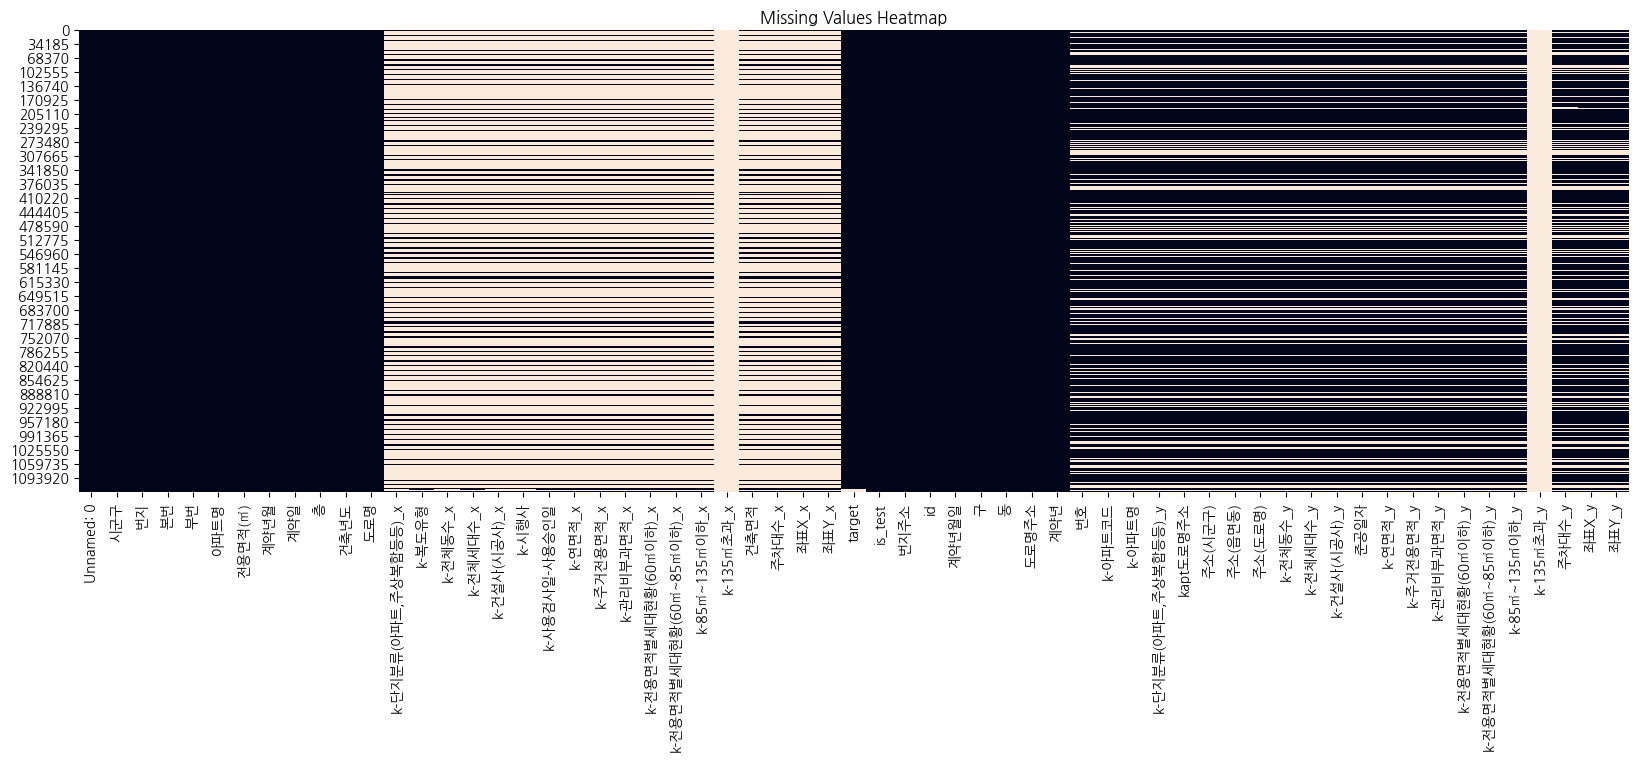

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(train_test_seoul_apart.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
train_test_seoul_apart.columns

Index(['Unnamed: 0', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일',
       '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)_x', 'k-복도유형', 'k-전체동수_x',
       'k-전체세대수_x', 'k-건설사(시공사)_x', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적_x',
       'k-주거전용면적_x', 'k-관리비부과면적_x', 'k-전용면적별세대현황(60㎡이하)_x',
       'k-전용면적별세대현황(60㎡~85㎡이하)_x', 'k-85㎡~135㎡이하_x', 'k-135㎡초과_x', '건축면적',
       '주차대수_x', '좌표X_x', '좌표Y_x', 'target', 'is_test', '번지주소', 'id', '계약년월일',
       '구', '동', '도로명주소', '계약년', '번호', 'k-아파트코드', 'k-아파트명',
       'k-단지분류(아파트,주상복합등등)_y', 'kapt도로명주소', '주소(시군구)', '주소(읍면동)', '주소(도로명)',
       'k-전체동수_y', 'k-전체세대수_y', 'k-건설사(시공사)_y', '준공일자', 'k-연면적_y',
       'k-주거전용면적_y', 'k-관리비부과면적_y', 'k-전용면적별세대현황(60㎡이하)_y',
       'k-전용면적별세대현황(60㎡~85㎡이하)_y', 'k-85㎡~135㎡이하_y', 'k-135㎡초과_y', '주차대수_y',
       '좌표X_y', '좌표Y_y'],
      dtype='object')

In [12]:
new_columns = ['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일',
       '층', '건축년도', '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일',
       '구', '동', '도로명주소', '계약년', '번호', 'k-아파트코드', 'k-아파트명',
       'k-단지분류(아파트,주상복합등등)_y', 'kapt도로명주소', '주소(시군구)', '주소(읍면동)', '주소(도로명)',
       'k-전체동수_y', 'k-전체세대수_y', 'k-건설사(시공사)_y', '준공일자', 'k-연면적_y',
       'k-주거전용면적_y', 'k-관리비부과면적_y', 'k-전용면적별세대현황(60㎡이하)_y',
       'k-전용면적별세대현황(60㎡~85㎡이하)_y', 'k-85㎡~135㎡이하_y', 'k-135㎡초과_y', '주차대수_y',
       '좌표X_y', '좌표Y_y']

In [14]:
train_test_seoul_apart = train_test_seoul_apart[new_columns]

In [15]:
new_name_columns = ['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일',
       '층', '건축년도', '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일',
       '구', '동', '도로명주소', '계약년', '번호', 'k-아파트코드', 'k-아파트명',
       'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)', '주소(읍면동)', '주소(도로명)',
       'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자', 'k-연면적',
       'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수',
       '좌표X', '좌표Y']

In [16]:
train_test_seoul_apart.columns = new_name_columns

In [18]:
train_test_seoul_apart.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_seoul_apart.csv', index=False)

# match_build_seoul_지번: 도로명주소 하나에 지번주소가 2개일 수 있다

In [93]:
match_build_seoul_no_duplicates.shape

(529304, 3)

In [70]:
doroaddress.columns

Index(['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'], dtype='object')

In [114]:
df_doro = doroaddress[['도로명주소','지번주소']].drop_duplicates()

In [115]:
df_doro.shape

(8327, 2)

In [116]:
df = pd.merge(match_build_seoul_no_duplicates, df_doro, on='도로명주소', how='left')

In [117]:
df.drop_duplicates(inplace=True)

In [119]:
df.shape

(529367, 4)

In [121]:
df

,도로명주소,출입구_x좌표_wgs84,출입구_y좌표_wgs84,지번주소
0,서울특별시 종로구 자하문로 94,126.970406,37.584415,NaN
1,서울특별시 종로구 자하문로 96,126.970423,37.584513,NaN
2,서울특별시 종로구 자하문로 98,126.970394,37.584697,NaN
3,서울특별시 종로구 자하문로 99-3,126.969878,37.584916,NaN
4,서울특별시 종로구 자하문로 99-4,126.969853,37.585080,NaN
...,...,...,...,...
529362,서울특별시 강동구 가래여울길 49,127.165354,37.575175,NaN
529363,서울특별시 강동구 가래여울길 52,127.164790,37.575474,NaN
529364,서울특별시 강동구 가래여울길 57,127.165166,37.574902,NaN
529365,서울특별시 강동구 가래여울길 59,127.165425,37.574825,NaN


In [85]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul_지번.csv')

In [91]:
match_build_seoul_지번 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul_지번.csv')

In [122]:
match_build_seoul_지번.shape

(529367, 5)

# train_test_seoul_apart + match_build_seoul_지번 : 

In [95]:
train_test_seoul_apart.shape

(1128094, 42)

In [96]:
match_build_seoul_지번.shape

(529367, 5)

In [123]:
train_test_seoul_apart.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구', '동', '도로명주소',
       '계약년', '번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소',
       '주소(시군구)', '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       '준공일자', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [124]:
match_build_seoul_지번

,Unnamed: 0,도로명주소,출입구_x좌표_wgs84,출입구_y좌표_wgs84,지번주소
0,0,서울특별시 종로구 자하문로 94,126.970406,37.584415,NaN
1,1,서울특별시 종로구 자하문로 96,126.970423,37.584513,NaN
2,2,서울특별시 종로구 자하문로 98,126.970394,37.584697,NaN
3,3,서울특별시 종로구 자하문로 99-3,126.969878,37.584916,NaN
4,4,서울특별시 종로구 자하문로 99-4,126.969853,37.585080,NaN
...,...,...,...,...,...
529362,529362,서울특별시 강동구 가래여울길 49,127.165354,37.575175,NaN
529363,529363,서울특별시 강동구 가래여울길 52,127.164790,37.575474,NaN
529364,529364,서울특별시 강동구 가래여울길 57,127.165166,37.574902,NaN
529365,529365,서울특별시 강동구 가래여울길 59,127.165425,37.574825,NaN


In [107]:
match_build_seoul_지번.columns

Index(['Unnamed: 0', '도로명주소', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소'], dtype='object')

In [112]:
# 중복된 조합 제거
unique_match_build_seoul = match_build_seoul_지번.drop_duplicates(subset=['도로명주소', '지번주소'])


In [113]:
unique_match_build_seoul.shape

(529322, 5)

In [125]:
df = pd.merge(train_test_seoul_apart, unique_match_build_seoul[['도로명주소', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소']], left_on=['번지주소','도로명주소'], right_on=['지번주소','도로명주소'], how='left')

In [126]:
df.shape

(1128094, 45)

In [128]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84.csv', index=False)

In [129]:
train_test_seoul_apart_wgs84 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84.csv')

/tmp/ipykernel_457004/2380515590.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test_seoul_apart_wgs84 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84.csv')


# station_distance

In [130]:
train_test_seoul_apart_wgs84.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구', '동', '도로명주소',
       '계약년', '번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소',
       '주소(시군구)', '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       '준공일자', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소'],
      dtype='object')

In [131]:
station_distance.columns

Index(['Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

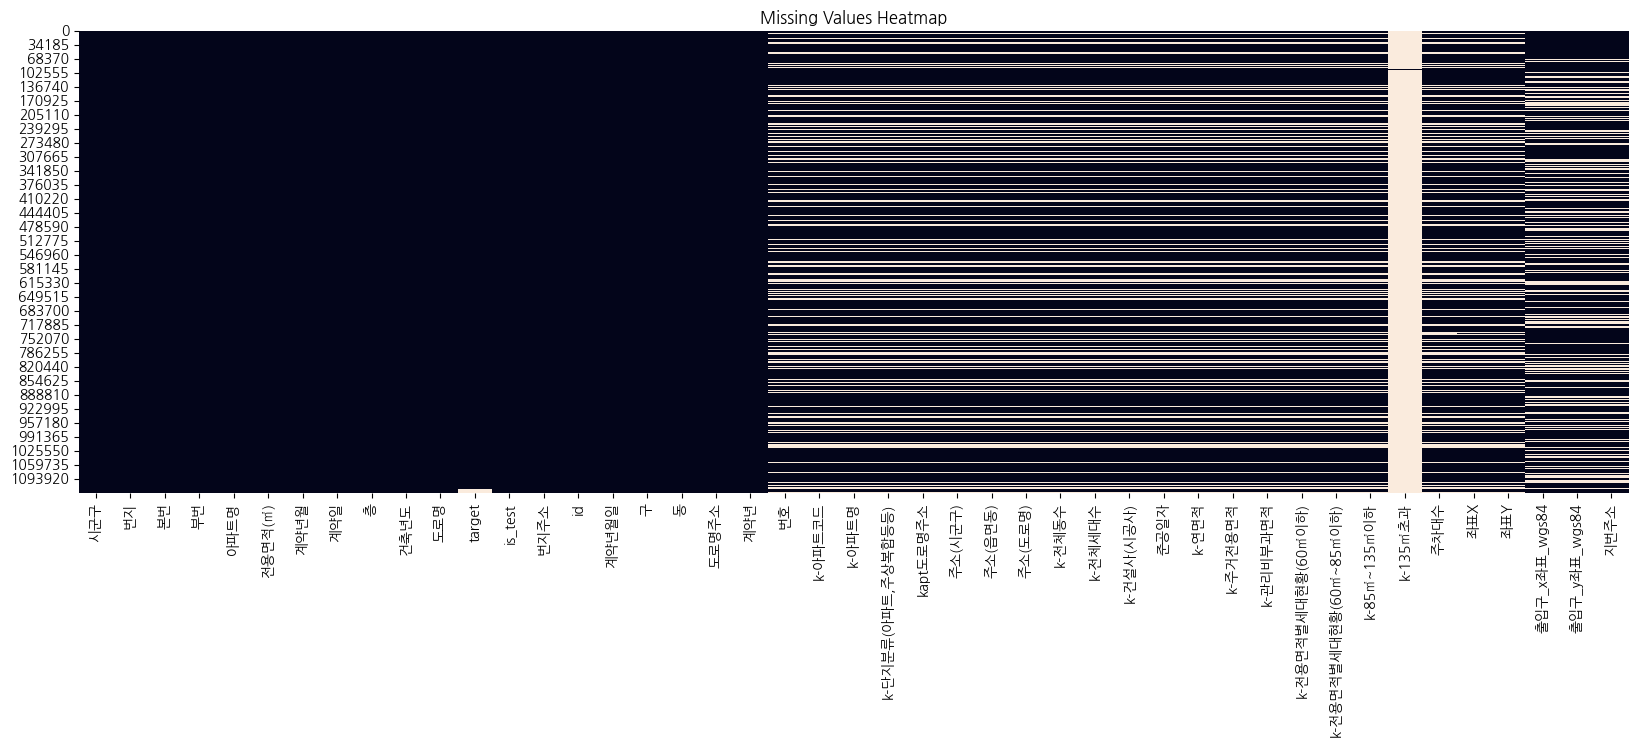

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(train_test_seoul_apart_wgs84.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# 일단 좌표X, 좌표Y, '출입구_x좌표_wgs84', '출입구_y좌표_wgs84' 로 하나의 final_X, final_Y를 만들기

In [159]:
# 일단 확인
train_test_seoul_apart_wgs84[train_test_seoul_apart_wgs84['도로명주소']=='서울특별시 강남구 삼성로 150']

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y,출입구_x좌표_wgs84,출입구_y좌표_wgs84,지번주소
1801,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,191.07,201710,23,6,1983,삼성로 150,320000.0,0,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 6층,2017-10-23,강남구,대치동,서울특별시 강남구 삼성로 150,2017,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1802,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,84.48,201710,27,6,1983,삼성로 150,169500.0,0,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 6층,2017-10-27,강남구,대치동,서울특별시 강남구 삼성로 150,2017,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1803,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,128.01,201711,3,9,1983,삼성로 150,225000.0,0,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 9층,2017-11-03,강남구,대치동,서울특별시 강남구 삼성로 150,2017,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1804,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,128.01,201711,14,4,1983,삼성로 150,220000.0,0,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 4층,2017-11-14,강남구,대치동,서울특별시 강남구 삼성로 150,2017,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1805,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,128.01,201711,22,11,1983,삼성로 150,233000.0,0,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 11층,2017-11-22,강남구,대치동,서울특별시 강남구 삼성로 150,2017,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119042,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,191.07,202308,23,5,1983,삼성로 150,NaN,1,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 5층,2023-08-23,강남구,대치동,서울특별시 강남구 삼성로 150,2023,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1119043,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션1,128.01,202308,29,3,1983,삼성로 150,NaN,1,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 3층,2023-08-29,강남구,대치동,서울특별시 강남구 삼성로 150,2023,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1119044,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션2,126.33,202307,1,14,1985,삼성로 150,NaN,1,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 14층,2023-07-01,강남구,대치동,서울특별시 강남구 삼성로 150,2023,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511
1119045,서울특별시 강남구 대치동,511,511.0,0.0,한보미도맨션2,84.96,202307,1,5,1985,삼성로 150,NaN,1,서울특별시 강남구 대치동 511,서울특별시 강남구 대치동 511 5층,2023-07-01,강남구,대치동,서울특별시 강남구 삼성로 150,2023,1710.0,A13528004,대치미도맨션,아파트,서울특별시 강남구 삼성로 150,강남구,대치동,삼성로,21.0,2436.0,한보주택(주),1983-11-28,362381.0,300675.0,362365.0,0.0,616.0,1344.0,NaN,2997.0,127.067338,37.493385,127.064106,37.493378,서울특별시 강남구 대치동 511


In [160]:
# 조건에 따라 'final_X' 열 생성
train_test_seoul_apart_wgs84['final_X'] = np.where(train_test_seoul_apart_wgs84['좌표X'].isna(),
                                                    train_test_seoul_apart_wgs84['출입구_x좌표_wgs84'],
                                                    train_test_seoul_apart_wgs84['좌표X'])

In [162]:
# 조건에 따라 'final_Y' 열 생성
train_test_seoul_apart_wgs84['final_Y'] = np.where(train_test_seoul_apart_wgs84['좌표Y'].isna(),
                                                    train_test_seoul_apart_wgs84['출입구_y좌표_wgs84'],
                                                    train_test_seoul_apart_wgs84['좌표Y'])

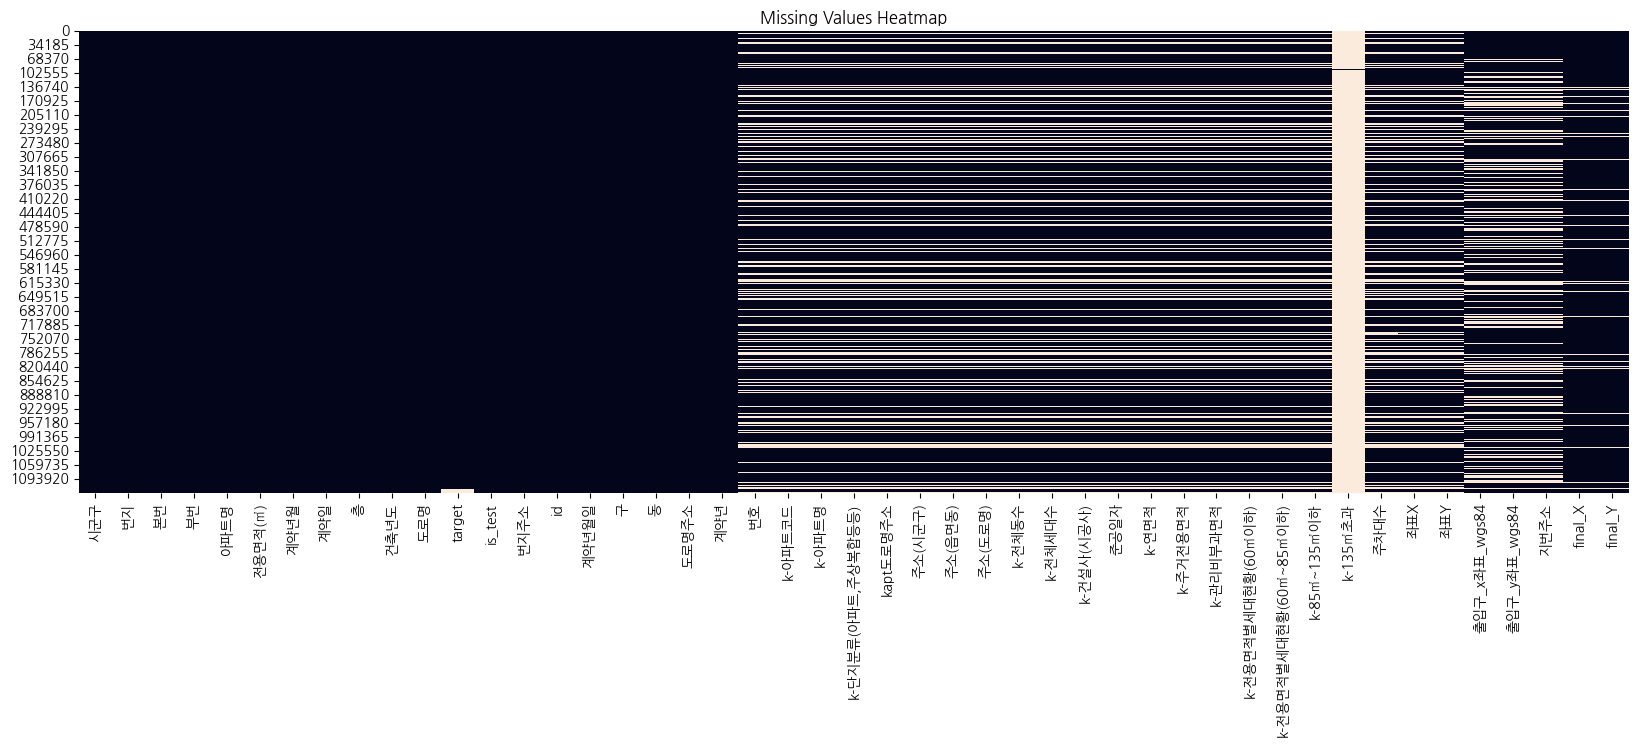

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(train_test_seoul_apart_wgs84.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
import numpy as np

# object를 numeric으로 바꿈
train_test_seoul_apart_wgs84['final_X'] = pd.to_numeric(train_test_seoul_apart_wgs84['final_X'], errors='coerce')
train_test_seoul_apart_wgs84['final_Y'] = pd.to_numeric(train_test_seoul_apart_wgs84['final_Y'], errors='coerce')

subset = train_test_seoul_apart_wgs84[['도로명주소','final_X','final_Y']].drop_duplicates() # (10567, 3)

# 버스 정류장 데이터
real_estate = pd.DataFrame({
    'Property_ID': subset.도로명주소,
    'X': subset.final_X,
    'Y': subset.final_Y,
})

Bus_stations = pd.DataFrame({
    'Bus_Station_ID': bus_feature['노드 ID'],
    'Station_Name': bus_feature.정류소명,
    'X': bus_feature.X좌표,
    'Y': bus_feature.Y좌표,
})

# 지하철 정류장 데이터
subway_stations = pd.DataFrame({
    'Subway_Station_ID': subway_feature.역사_ID,
    'Station_Name': subway_feature.역사명,
    'X': subway_feature.경도,
    'Y': subway_feature.위도,
})

def haversine_np(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance between two points on the earth (specified in decimal degrees)"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c  # Multiply by Earth radius to get kilometers
    return km

# 가장 가까운 정류소 계산
def calculate_nearest_station(real_estate, stations):
    min_distances = []
    nearest_station_names = []
    for index, real in real_estate.iterrows():
        distances = haversine_np(real['X'], real['Y'], stations['X'].values, stations['Y'].values)
        min_index = distances.argmin()
        min_distances.append(distances[min_index])
        nearest_station_names.append(stations.iloc[min_index]['Station_Name'])
    return min_distances, nearest_station_names

# 버스 정류장
min_distances, nearest_station_names = calculate_nearest_station(real_estate, Bus_stations)
real_estate['Nearest_Bus_Station_Distance'] = min_distances
real_estate['Nearest_Bus_Station_Name'] = nearest_station_names

# 지하철역
min_distances, nearest_station_names = calculate_nearest_station(real_estate, subway_stations)
real_estate['Nearest_Subway_Station_Distance'] = min_distances
real_estate['Nearest_Subway_Station_Name'] = nearest_station_names

print(real_estate.head(1))


In [ ]:
real_estate

In [177]:
# 중복된 Property_ID 제거
real_estate_unique = real_estate.drop_duplicates(subset=['Property_ID'])

In [178]:
df = pd.merge(train_test_seoul_apart_wgs84, real_estate_unique, left_on=['도로명주소'], right_on=['Property_ID'], how='left')

In [179]:
df.shape

(1128094, 54)

In [176]:
train_test_seoul_apart_wgs84.shape

(1128094, 47)

In [180]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84_station.csv')

# seoul_apart_jimi

In [140]:
seoul_apart_jimi.shape

(4011, 34)

In [183]:
train_test_seoul_apart_wgs84_station.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구', '동', '도로명주소',
       '계약년', '번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소',
       '주소(시군구)', '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       '준공일자', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소', 'final_X', 'final_Y',
       'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

In [142]:
seoul_apart_jimi.columns

Index([         '입주유형',           '단지명',         '도로명주소',          '지번주소',
                  '동수',        '합계 세대수',        '분양 세대수',        '임대 세대수',
            '토지 면적(㎡)',         '합계 동수',         '5층 동수',        '5층 세대수',
            '6~10층 동수',     '6~10층 세대수',     '11~15층 동수',    '11~15층 세대수',
           '16~20층 동수',    '16~20층 세대수',      '21층이상 동수',     '21층이상 세대수',
            '~40㎡ 세대수',   '40㎡~60㎡ 세대수',   '60㎡~85㎡ 세대수',  '85㎡~102㎡ 세대수',
       '102㎡~135㎡ 세대수',     '135㎡~ 세대수',   'Unnamed: 26',   'Unnamed: 27',
         'Unnamed: 28',   'Unnamed: 29',   'Unnamed: 30',   'Unnamed: 31',
                   117,             364],
      dtype='object')

In [184]:
# 중복된 조합 제거
seoul_apart_jimi_unique = seoul_apart_jimi.drop_duplicates(subset=['지번주소', '도로명주소'])

df = pd.merge(train_test_seoul_apart_wgs84_station, seoul_apart_jimi_unique[[         '입주유형',           '단지명',         '도로명주소',          '지번주소',
                  '동수',        '합계 세대수',        '분양 세대수',        '임대 세대수',
            '토지 면적(㎡)',         '합계 동수',         '5층 동수',        '5층 세대수',
            '6~10층 동수',     '6~10층 세대수',     '11~15층 동수',    '11~15층 세대수',
           '16~20층 동수',    '16~20층 세대수',      '21층이상 동수',     '21층이상 세대수',
            '~40㎡ 세대수',   '40㎡~60㎡ 세대수',   '60㎡~85㎡ 세대수',  '85㎡~102㎡ 세대수',
       '102㎡~135㎡ 세대수',     '135㎡~ 세대수']], left_on=['번지주소','도로명주소'], right_on=['지번주소','도로명주소'], how='left')

In [185]:
df.shape

(1128094, 79)

In [186]:
train_test_seoul_apart_wgs84_station.shape

(1128094, 54)

In [187]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84_station_jimi.csv')

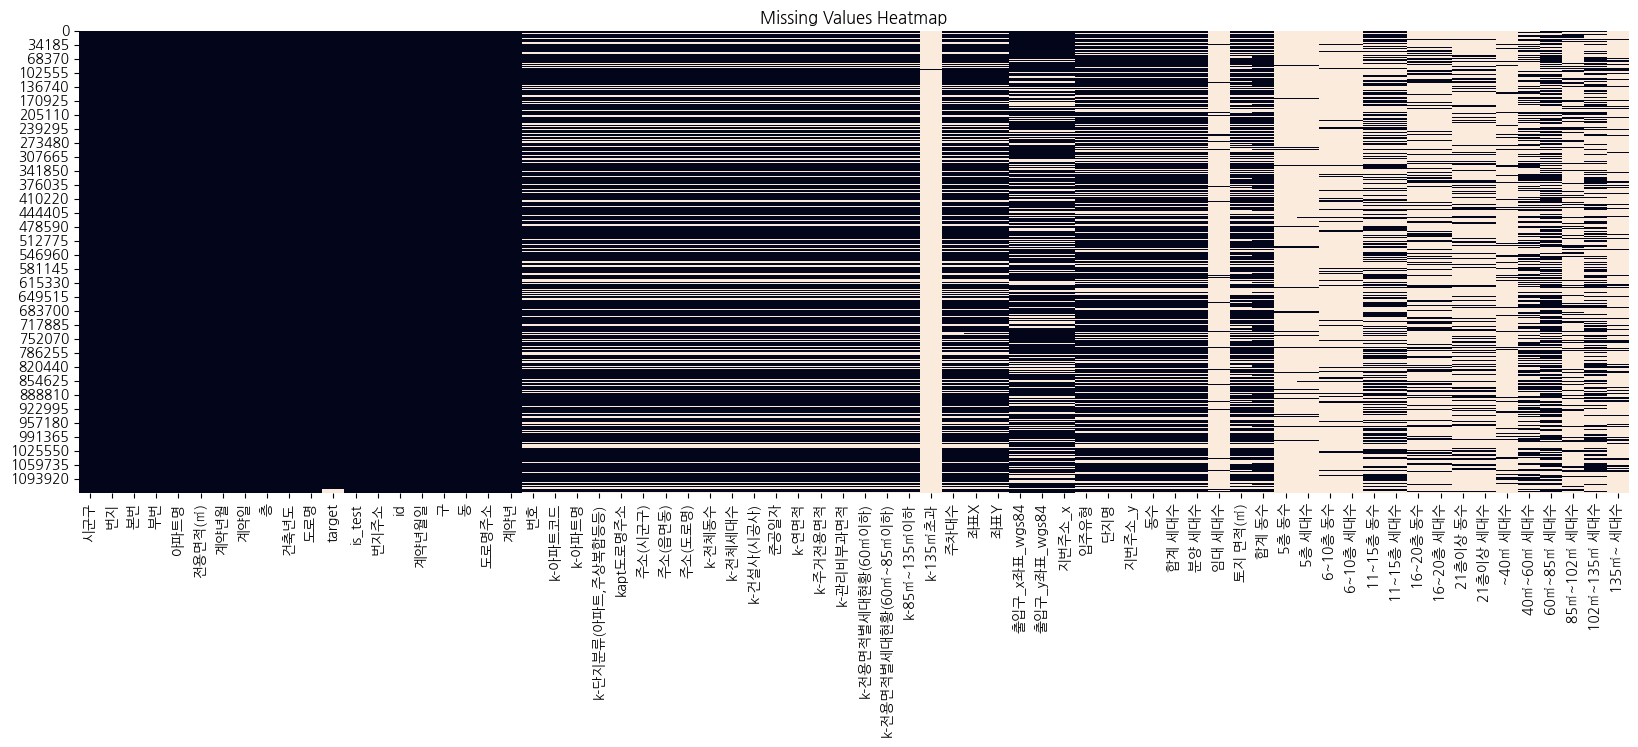

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 서울특별시_부동산소비심리지수 컬럼 추가

In [189]:
import pandas as pd
import numpy as np

train_test_seoul_apart_wgs84_station_jimi['계약년월'] = train_test_seoul_apart_wgs84_station_jimi['계약년월'].astype(str)

# 제공된 지수 데이터
indices = [133.4, 136.7, 131.7, 123.6, 116.2, 108, 109.8, 115.8, 115.4, 112.5, 110.6, 99.9, 100.6, 102.3, 106.7, 109.4, 103.1, 101.4, 104.2, 111.7, 113.9, 112.1, 111.4, 109.1, 107.7, 113, 119.2, 122.5, 118, 111.7, 121.3, 127.8, 122.7, 123.3, 118.8, 111.7, 117.4, 122.4, 127.8, 128.6, 125, 114.8, 126.2, 127.1, 132.3, 134.1, 130.6, 126, 131, 130.3, 127.9, 134.7, 127.2, 112.7, 116.7, 119.5, 121.4, 125.1, 123.1, 122, 126.5, 129, 131.4, 135.9, 125.5, 111.5, 114.7, 114.5, 114.7, 115.9, 115.7, 111.6, 115.2, 110.9, 103.6, 105.6, 101.2, 94.2, 98.4, 101.4, 97.1, 93.5, 89.6, 86.9, 88.6, 91.8, 96.9, 94.1, 88.2, 87.2, 90.1, 89.6, 87.6, 81.6, 84.7, 89, 88.5, 92.6, 100.4, 101.5, 113.3, 110.4, 105.8, 105.9, 99.5, 97.5, 101.8, 112.1, 107.9, 111.1, 116.6, 132.5, 135.5, 118.3, 115.6, 115.4, 115.8, 114.7, 118.4, 121.7, 121.7, 124.2, 123.2, 116.5, 109.9, 102.2, 101.5, 102.7, 105.1, 107.9, 103.7, 97.5, 90.8, 89.1, 86.7, 76.8, 78.3, 75.7, 80.2, 88.4, 89, 93.2, 94.6, 94.4, 100.2, 99.9, 100.9]

# 날짜 범위 생성
dates = pd.date_range(start='2011-07-01', periods=len(indices), freq='M')

# 데이터프레임 생성
index_df = pd.DataFrame({'계약년월': dates, '서울특별시_부동산소비심리지수': indices})

# 계약년월을 문자열 형태로 변환 (예: 202307)
index_df['계약년월'] = index_df['계약년월'].dt.strftime('%Y%m')




# 병합 수행
train_test_seoul_apart_wgs84_station_jimi = pd.merge(train_test_seoul_apart_wgs84_station_jimi, index_df, on='계약년월', how='left')


/tmp/ipykernel_457004/813852993.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2011-07-01', periods=len(indices), freq='M')


# finance

In [222]:
finance = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/finance_수정본.csv')

In [196]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

In [200]:
finance.columns

Index(['시점', '기준금리', '국고채', '회사채', '국고채-회사채', '생산자물가지수', '소비자물가지수',
       '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량',
       '전국매매가격지수', '전국전세가격지수', '서울특별시_주택인허가실적', '서울특별시_주택착공실적', '서울특별시_주택준공실적',
       '서울특별시_주택미분양', '미분양_서울특별시'],
      dtype='object')

In [201]:
finance

,시점,기준금리,국고채,회사채,국고채-회사채,생산자물가지수,소비자물가지수,서울특별시_가계대출,서울특별시_주택담보대출,서울특별시_주택매매거래량,서울특별시_아파트매매거래량,전국매매가격지수,전국전세가격지수,서울특별시_주택인허가실적,서울특별시_주택착공실적,서울특별시_주택준공실적,서울특별시_주택미분양,미분양_서울특별시
0,200701,4.5,4.970,5.320,0.350,83.99,76.496,NaN,NaN,16826.0,6353.0,66.892,54.735,1530.0,NaN,NaN,697.0,697.0
1,200702,4.5,4.910,5.280,0.370,84.04,77.017,NaN,NaN,12029.0,4403.0,67.210,54.971,2324.0,NaN,NaN,590.0,590.0
2,200703,4.5,4.790,5.200,0.410,84.40,77.464,NaN,NaN,13487.0,5597.0,67.382,55.256,4212.0,NaN,NaN,687.0,687.0
3,200704,4.5,4.940,5.340,0.400,84.99,77.761,NaN,NaN,14349.0,5948.0,67.530,55.485,6175.0,NaN,NaN,685.0,685.0
4,200705,4.5,5.100,5.490,0.390,85.47,77.836,NaN,NaN,12552.0,4743.0,67.554,55.471,8041.0,NaN,NaN,704.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,202402,3.5,3.351,4.053,0.702,118.55,113.780,413811.5,257311.0,4795.0,2665.0,93.050,88.848,4952.0,1266.0,3496.0,1018.0,1018.0
206,202403,3.5,3.310,3.944,0.634,118.82,113.950,412503.1,257297.6,6098.0,3482.0,92.884,88.926,6493.0,6944.0,2362.0,968.0,968.0
207,202404,3.5,3.439,3.974,0.535,119.16,114.010,414624.4,258928.8,7898.0,4840.0,92.814,89.030,7159.0,1084.0,585.0,936.0,936.0
208,202405,3.5,3.432,3.876,0.444,119.25,114.100,NaN,NaN,8445.0,5182.0,92.790,89.203,10530.0,1531.0,4341.0,974.0,974.0


In [223]:
train_test_seoul_apart_wgs84_station_jimi['계약년월'] = train_test_seoul_apart_wgs84_station_jimi['계약년월'].astype(int)

In [224]:
df = pd.merge(train_test_seoul_apart_wgs84_station_jimi, finance, left_on='계약년월', right_on='시점', how='left')

In [225]:
df.shape

(1128094, 99)

# 미분양

In [214]:
미분양 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/미분양.csv', encoding='cp949')

In [215]:
미분양.columns

Index(['계약년월', '종로구', '중구', '성동구', '용산구', '광진구', '동대문구', '성북구', '중랑구', '노원구',
       '은평구', '서대문구', '강북구', '마포구', '도봉구', '양천구', '강서구', '구로구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '금천구', '강동구', '송파구'],
      dtype='object')

In [ ]:
import pandas as pd

# train_test_seoul_apart_wgs84_station_jimi에 '미분양수' 컬럼 추가
train_test_seoul_apart_wgs84_station_jimi['미분양_구'] = None  # 초기값 설정

# 각 행에 대해 미분양수 업데이트
for idx, row in train_test_seoul_apart_wgs84_station_jimi.iterrows():
    year_month = int(row['계약년월'])
    district = row['구']
    
    # 미분양 데이터셋에서 해당 연도와 구의 미분양 수 가져오기
    if district in 미분양.columns[1:]:
        unsold_count = 미분양.loc[미분양['계약년월']==year_month, district]
        
        if not unsold_count.empty:
            print(f"{unsold_count.iloc[0]}")
            train_test_seoul_apart_wgs84_station_jimi.at[idx, '미분양_구'] = unsold_count.iloc[0]
        else:
            print(f"No data for {district} in {year_month}")
    else:
        print("why")

# 결과 출력
print(train_test_seoul_apart_wgs84_station_jimi[['계약년월', '구', '미분양_구']].head())


In [221]:
train_test_seoul_apart_wgs84_station_jimi.shape

(1128094, 81)

In [226]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84_station_jimi_finance.csv', index=False)

# academy

In [231]:
academy.columns

Index(['Unnamed: 0', '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소',
       '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수',
       '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수',
       '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x',
       '동도로명주소_x'],
      dtype='object')

In [236]:
new_columns=['지번주소',
       '공시가격기반단지명', '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수',
       '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수',
       '직업기술학원수', '기타학원수', '도로명주소_x']

In [237]:
academy = academy[new_columns]

In [239]:
new_name_columns = ['지번주소',
       '공시가격기반단지명', '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수',
       '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수',
       '직업기술학원수', '기타학원수', '도로명주소']

In [240]:
academy.columns = new_name_columns

In [255]:
# 중복된 조합 제거
unique_academy = academy.drop_duplicates(subset=['도로명주소', '지번주소'])


In [257]:
unique_academy.shape

(9057, 18)

In [258]:
df = pd.merge(train_test_seoul_apart_wgs84_station_jimi_fiance, unique_academy, left_on=['번지주소','도로명주소'], right_on=['지번주소','도로명주소'], how='left')

In [259]:
df.shape

(1128094, 116)

In [262]:
train_test_seoul_apart_wgs84_station_jimi_fiance_academy = df.copy()

In [263]:
train_test_seoul_apart_wgs84_station_jimi_fiance_academy.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/train_test_seoul_apart_wgs84_station_jimi_fiance_academy.csv', index=False)

In [260]:
trainset_0715 = df.copy()

In [261]:
trainset_0715.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/trainset_0715.csv', index=False)